<a href="https://colab.research.google.com/github/wasay-git-hub/Movie-Budget-and-Revenue-Dataset-Analysis/blob/main/Seaborn_and_Linear_Regression_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [ ]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [ ]:
data.dtypes

,0
Rank,int64
Release_Date,object
Movie_Title,object
USD_Production_Budget,object
USD_Worldwide_Gross,object
USD_Domestic_Gross,object


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [ ]:
data['USD_Production_Budget'] = data['USD_Production_Budget'].replace({'\$':'',',':''}, regex=True)
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].replace({'\$':'',',':''}, regex=True)
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].replace({'\$':'',',':''}, regex=True)

data['USD_Production_Budget'] = pd.to_numeric(data['USD_Production_Budget'])
data['USD_Worldwide_Gross'] = pd.to_numeric(data['USD_Worldwide_Gross'])
data['USD_Domestic_Gross'] = pd.to_numeric(data['USD_Domestic_Gross'])

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1212209734.py:1: SyntaxWarning: invalid escape sequence '\$'
  data['USD_Production_Budget'] = data['USD_Production_Budget'].replace({'\$':'',',':''}, regex=True)
/tmp/ipython-input-1212209734.py:2: SyntaxWarning: invalid escape sequence '\$'
  data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].replace({'\$':'',',':''}, regex=True)
/tmp/ipython-input-1212209734.py:3: SyntaxWarning: invalid escape sequence '\$'
  data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].replace({'\$':'',',':''}, regex=True)


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [ ]:
data.dtypes

,0
Rank,int64
Release_Date,datetime64[ns]
Movie_Title,object
USD_Production_Budget,int64
USD_Worldwide_Gross,int64
USD_Domestic_Gross,int64


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [ ]:
print(data['USD_Production_Budget'].mean())
print(data['USD_Worldwide_Gross'].mean())
data.describe()

31113737.57837136
88855421.96271564


,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [ ]:
print(data['USD_Production_Budget'][data['USD_Domestic_Gross']==0].max()) #512
#175000000

175000000


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [ ]:
print(data[data['USD_Worldwide_Gross']==0].count()) #357
print(data['USD_Production_Budget'][data['USD_Worldwide_Gross']==0].max()) #175000000

Rank                     357
Release_Date             357
Movie_Title              357
USD_Production_Budget    357
USD_Worldwide_Gross      357
USD_Domestic_Gross       357
dtype: int64
175000000


### Filtering on Multiple Conditions

In [ ]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) &
                                  (data.USD_Worldwide_Gross != 0)]
print(f"International Releases: {len(international_releases)}")
international_releases.head()

International Releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,2/16/1956,Carousel,3380000,3220,0
1579,5087,2/11/2001,Everything Put Together,500000,7890,0
1744,3695,12/31/2001,The Hole,7500000,10834406,0
2155,4236,12/31/2003,Nothing,4000000,63180,0
2203,2513,3/31/2004,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [ ]:
international_movies = data.query("USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0")
international_movies.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,2/16/1956,Carousel,3380000,3220,0
1579,5087,2/11/2001,Everything Put Together,500000,7890,0
1744,3695,12/31/2001,The Hole,7500000,10834406,0
2155,4236,12/31/2003,Nothing,4000000,63180,0
2203,2513,3/31/2004,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [ ]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
data.Release_Date = pd.to_datetime(data['Release_Date'])
not_released = data.query('Release_Date > @scrape_date')
print(len(not_released))
not_released

7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [ ]:
not_screened = data.query('Release_Date < @scrape_date and USD_Worldwide_Gross == 0	and USD_Domestic_Gross == 0')
print(len(not_screened))
data_clean = data.drop(not_released.index)

350


### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [ ]:
loss_films = data.query('USD_Production_Budget	> USD_Worldwide_Gross')
print(f'Percentage of lossy films: {(len(loss_films)/len(data_clean))*100}')
data_clean.describe()

Percentage of lossy films: 37.40713224368499


,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,384.00",5384,"5,384.00","5,384.00","5,384.00"
mean,"2,698.11",2003-09-12 00:26:12.659732480,"31,038,476.84","88,970,947.21","41,289,131.75"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,351.75",1999-12-02 00:00:00,"5,000,000.00","3,929,036.00","1,354,765.25"
50%,"2,698.50",2006-06-16 00:00:00,"17,000,000.00","27,537,329.00","17,221,932.00"
75%,"4,045.25",2011-11-18 00:00:00,"40,000,000.00","96,641,996.25","52,403,530.00"
max,"5,391.00",2017-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,555.79",NaN,"40,440,041.47","168,536,755.89","66,055,507.64"


# Seaborn for Data Viz: Bubble Charts

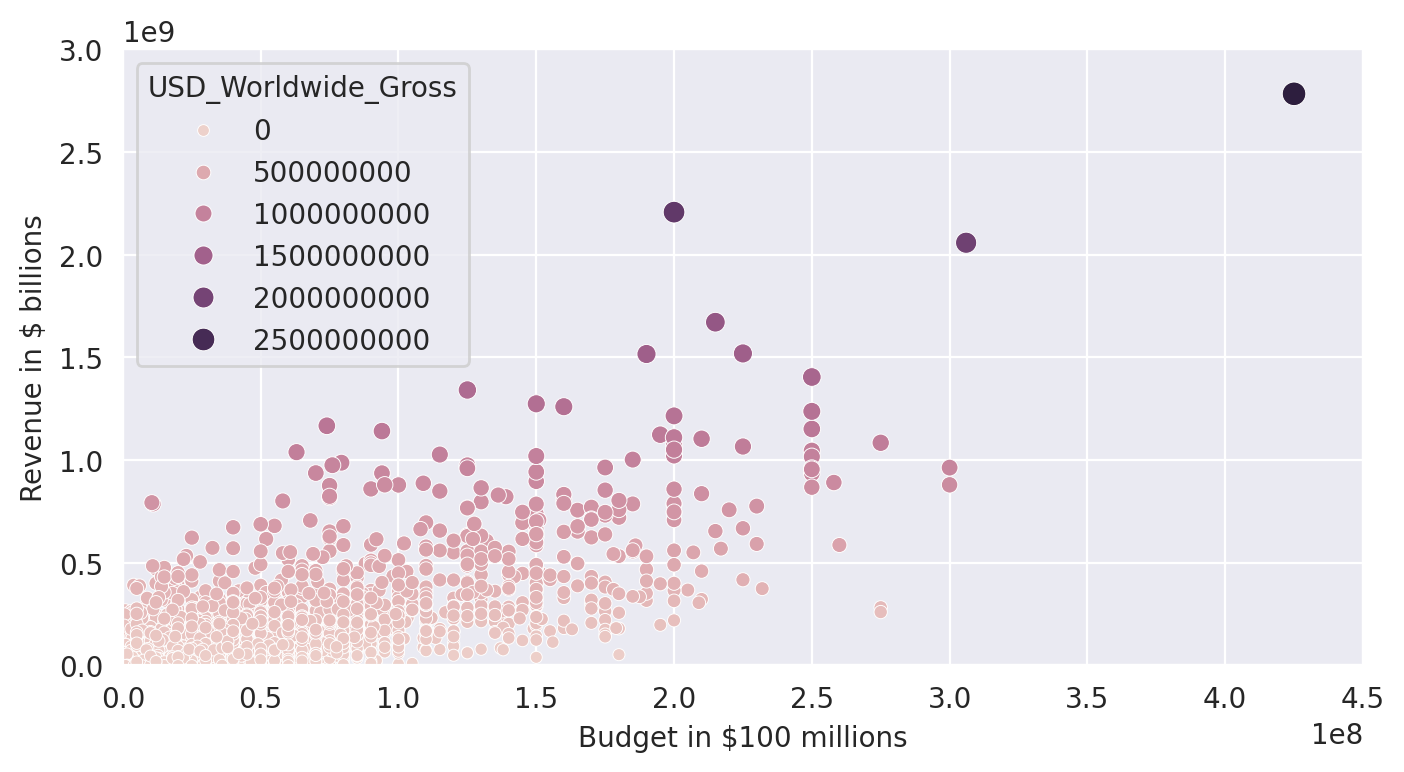

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget',
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')

  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



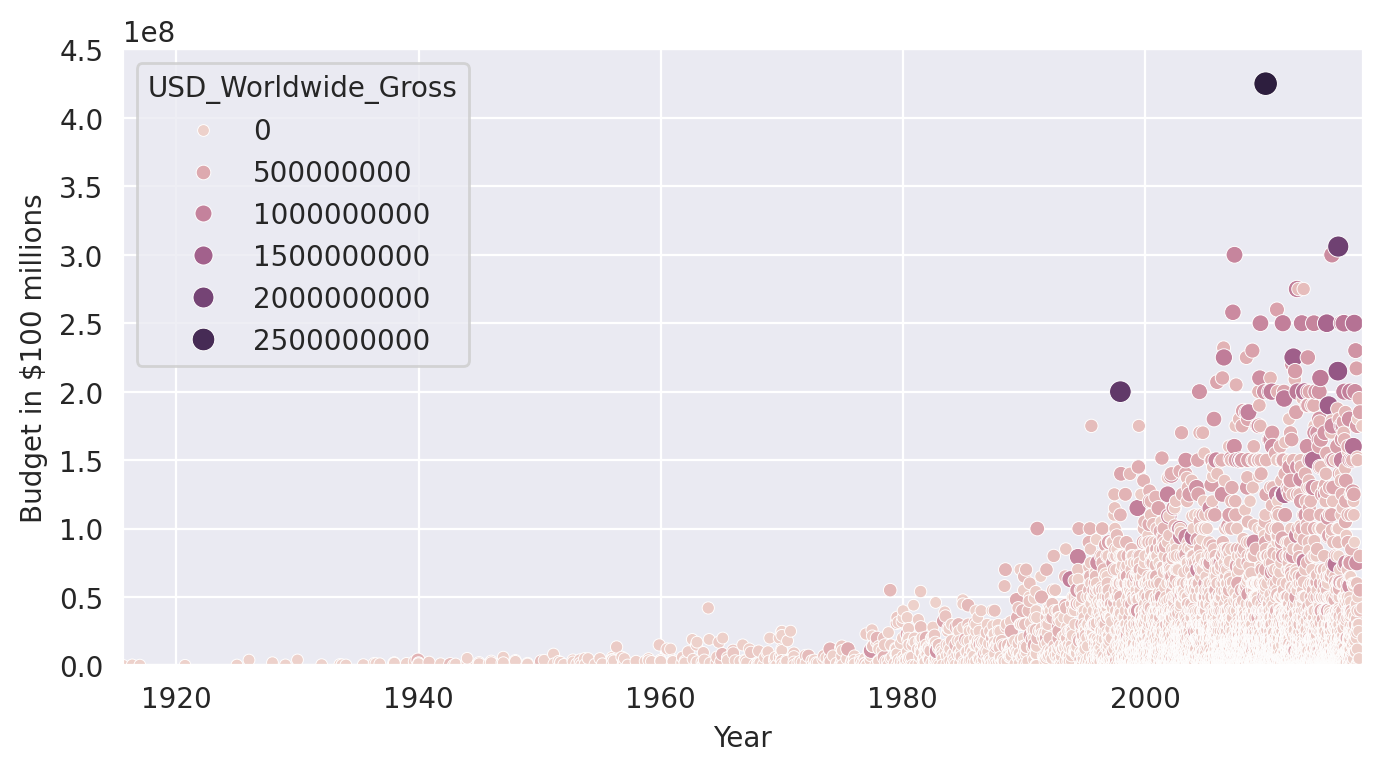

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data= data_clean,
                       x='Release_Date',
                       y='USD_Production_Budget',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross'
                      )
  ax.set(ylim=(0, 450000000),
         xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
         ylabel='Budget in $100 millions',
         xlabel='Year')
plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [ ]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year
decades = years//10*10
data_clean['Decade'] = decades

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [ ]:
old_films = data_clean.query('Decade <= 1969')
new_films = data_clean.query('Decade >= 1970')
print(len(old_films))
new_films.describe()

153


,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,"5,231.00",5231,"5,231.00","5,231.00","5,231.00","5,231.00"
mean,"2,652.00",2005-02-19 05:27:18.615943424,"31,811,437.73","90,683,497.56","41,841,922.35","2,000.19"
min,1.00,1970-01-01 00:00:00,"1,100.00",0.00,0.00,"1,970.00"
25%,"1,314.50",2000-07-14 00:00:00,"5,000,000.00","3,831,677.00","1,252,581.00","2,000.00"
50%,"2,629.00",2006-10-03 00:00:00,"18,000,000.00","28,544,120.00","17,510,118.00","2,000.00"
75%,"3,967.50",2012-01-06 00:00:00,"40,000,000.00","98,777,000.00","53,301,583.00","2,010.00"
max,"5,391.00",2017-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00","2,010.00"
std,"1,549.33",NaN,"40,758,580.67","170,424,978.36","66,702,734.68",9.58


# Seaborn Regression Plots

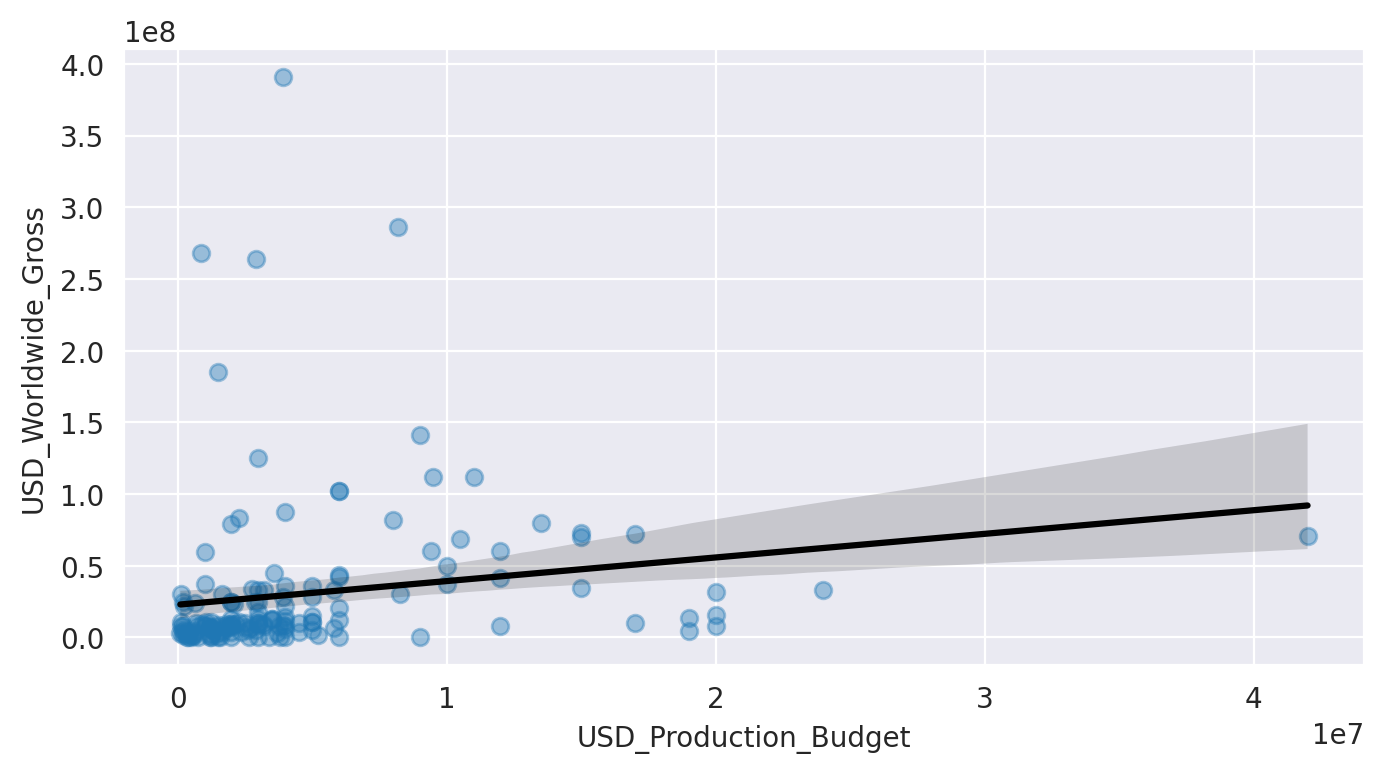

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

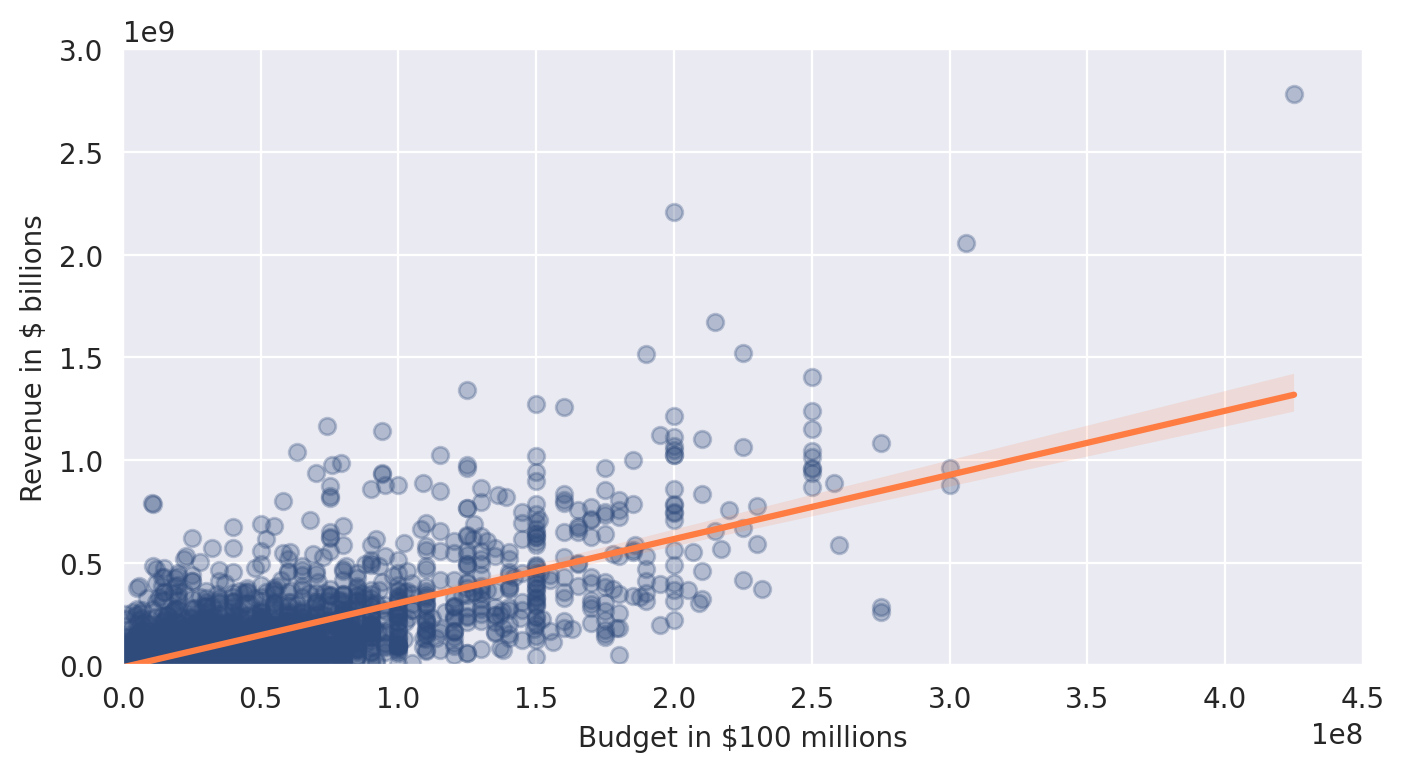

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})

  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [ ]:
model = LinearRegression()
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])
model.fit(X,y)
print(model.intercept_)
print(model.coef_)
model.score(X, y)

[-8650768.00661027]
[[3.12259592]]


0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [ ]:
model_old = LinearRegression()
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
model_old.fit(X,y)
print(model_old.intercept_)
print(model_old.coef_)

[22821538.63508039]
[[1.64771314]]


In [ ]:
model_old.score(X, y)

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [ ]:
budget = 350000000
predicted_revenue = model.coef_[0,0]*budget + model.intercept_[0]
revenue_estimate = round(predicted_revenue, -6)
print(f'The estimated revenue for a $350 film is around ${predicted_revenue:.10}.')

The estimated revenue for a $350 film is around $1.084257803e+09.


In [ ]:
budget = 350000000
predicted_revenue = model_old.coef_[0,0]*budget + model_old.intercept_[0]
revenue_estimate = round(predicted_revenue, -6)
print(f'The estimated revenue for a $350 film is around ${predicted_revenue:.10}.')

The estimated revenue for a $350 film is around $599521139.0.
